In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
data = pd.read_csv('TANKTemp060_098.csv',sep=",", header=None, names=["date", "value"])

In [3]:
data = data.dropna()
data = data.reset_index(drop=True)

data['StandardTime']=0


In [4]:
import calendar
import datetime

for i in range(len(data)):
    dd=data['date'][i].split('-')
    yy=int(dd[0])
    jd=int(dd[1])
    sec=dd[2].split(':')
    ss=sec[2][:-4]
    mm=sec[2][-3:]
    month = 1
    day = 0
    while jd - calendar.monthrange(yy,month)[1] > 0 and month <= 12:
        jd = jd - calendar.monthrange(yy,month)[1]
        month = month + 1

    data['StandardTime'][i]=datetime.datetime(yy, month, jd, int(sec[0]),int(sec[1]),int(ss),int(mm)*1000)

In [5]:
data.head()

,date,value,StandardTime
0,2015-060-00:00:30.114,18.744939,2015-03-01 00:00:30.114000
1,2015-060-00:00:30.882,18.744900,2015-03-01 00:00:30.882000
2,2015-060-00:02:38.114,18.785425,2015-03-01 00:02:38.114000
3,2015-060-00:02:38.882,18.785400,2015-03-01 00:02:38.882000
4,2015-060-00:04:46.114,18.785425,2015-03-01 00:04:46.114000


In [6]:
data_std=data.copy()

In [7]:
data_std.StandardTime = pd.to_datetime(data_std.StandardTime)
data_std = data_std.set_index('StandardTime')

In [8]:
data_std

,date,value
StandardTime,,
2015-03-01 00:00:30.114,2015-060-00:00:30.114,18.744939
2015-03-01 00:00:30.882,2015-060-00:00:30.882,18.744900
2015-03-01 00:02:38.114,2015-060-00:02:38.114,18.785425
2015-03-01 00:02:38.882,2015-060-00:02:38.882,18.785400
2015-03-01 00:04:46.114,2015-060-00:04:46.114,18.785425
...,...,...
2015-04-08 02:25:34.114,2015-098-02:25:34.114,18.502024
2015-04-08 02:27:42.114,2015-098-02:27:42.114,18.502024
2015-04-08 02:29:50.110,2015-098-02:29:50.110,18.542510


In [9]:
data_std.drop('date', axis=1, inplace=True)
data_std.head()

,value
StandardTime,
2015-03-01 00:00:30.114,18.744939
2015-03-01 00:00:30.882,18.744900
2015-03-01 00:02:38.114,18.785425
2015-03-01 00:02:38.882,18.785400
2015-03-01 00:04:46.114,18.785425


In [10]:
qt1 = data_std.quantile([.25])
qt1=float(qt1.to_numpy())
qt3 = data_std.quantile([.75])
qt3 = float(qt3.to_numpy())
print(qt1,qt3)
print(type(qt3))

18.947368 20.752688
<class 'float'>


In [11]:
# calculate max value of boxplot
max_box = qt3+(1.5*(qt3-qt1))
max_box

23.460668

In [12]:
# remove outlier
data_std.drop(data_std[data_std['value']>max_box].index, inplace=True)

In [13]:
type(data_std)

pandas.core.frame.DataFrame

In [14]:
data_std

,value
StandardTime,
2015-03-01 00:00:30.114,18.744939
2015-03-01 00:00:30.882,18.744900
2015-03-01 00:02:38.114,18.785425
2015-03-01 00:02:38.882,18.785400
2015-03-01 00:04:46.114,18.785425
...,...
2015-04-08 02:25:34.114,18.502024
2015-04-08 02:27:42.114,18.502024
2015-04-08 02:29:50.110,18.542510


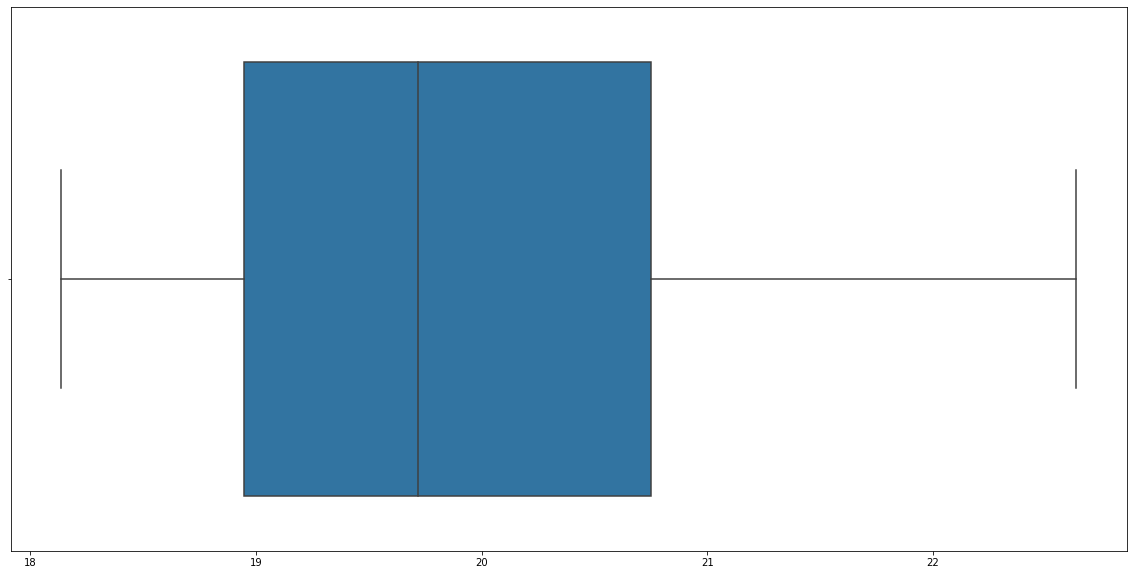

In [15]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.boxplot(data_std)

Text(0.5, 0, 'Time')

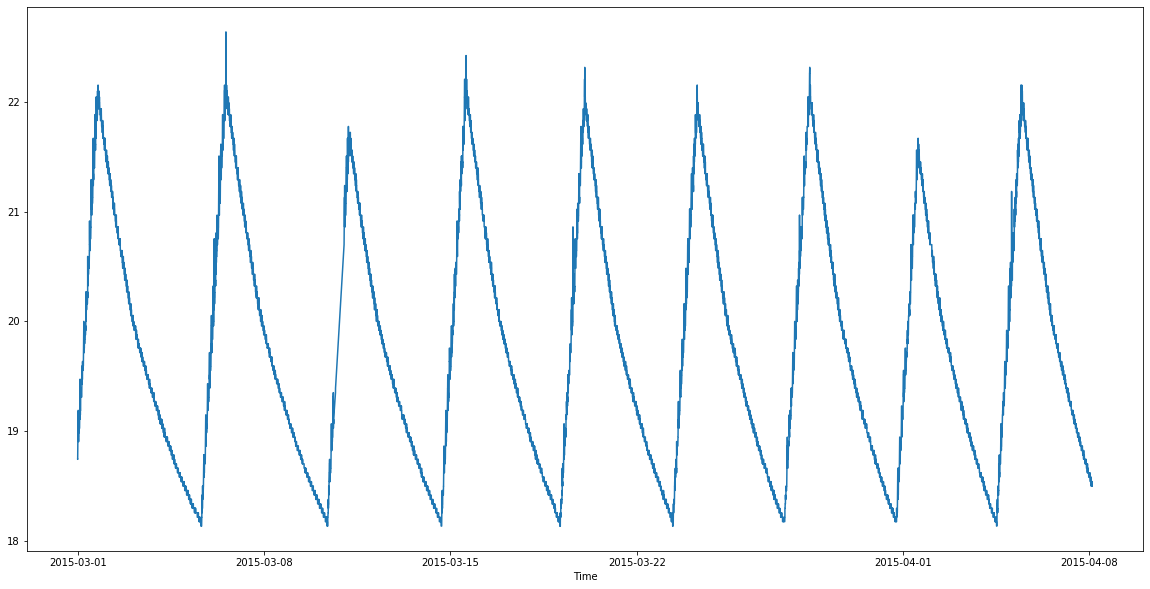

In [16]:
plt.figure(figsize=(20,10))
plt.plot(data_std)
plt.xlabel('Time')

In [ ]:
z = np.polyfit(x, y, 3)

In [18]:
data_p = data_std.copy(data_p.head()data_p['epoch']=0
data_p.head()for i_m in range(len(data_p)):
    # convert utc -> epoch(sec)
    dd = time.mktime(data_p['StandardTime'][i_m].timetuple())
    ms = int(int(str(data_p['StandardTime'][i_m]).split('.')[1])/1000)
    # build epoch (millisec) by add microsec from utc to epoch(sec)
    ep_mil = int(str(int(dd))+str(ms))
    # add epoch (milsec) -> epoch column
    data_p['epoch'][i_m] = ep_mil

data_p.head()

data_p.shape

data_pred=data_p.copy()
data_pred.head())

In [19]:
data_p['epoch']=0
data_p.head()

,value,epoch
StandardTime,,
2015-03-01 00:00:30.114,18.744939,0
2015-03-01 00:00:30.882,18.744900,0
2015-03-01 00:02:38.114,18.785425,0
2015-03-01 00:02:38.882,18.785400,0
2015-03-01 00:04:46.114,18.785425,0


In [21]:
from datetime import datetime
import time

for i_m in range(len(data_p)):
    # convert utc -> epoch(sec)
    dd = time.mktime(data_p['StandardTime'][i_m].timetuple())
    ms = int(int(str(data_p['StandardTime'][i_m]).split('.')[1])/1000)
    # build epoch (millisec) by add microsec from utc to epoch(sec)
    ep_mil = int(str(int(dd))+str(ms))
    # add epoch (milsec) -> epoch column
    data_p['epoch'][i_m] = ep_mil

KeyError: 'StandardTime'

In [ ]:
data_p.head()

In [30]:
data_p.shape

(32117, 3)

In [31]:
data_pred=data_p.copy()
data_pred.head()import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('TANKTemp060_098.csv',sep=",", header=None, names=["date", "value"])

data = data.dropna()
data = data.reset_index(drop=True)

data['StandardTime']=0


import calendar
import datetime

for i in range(len(data)):
    dd=data['date'][i].split('-')
    yy=int(dd[0])
    jd=int(dd[1])
    sec=dd[2].split(':')
    ss=sec[2][:-4]
    mm=sec[2][-3:]
    month = 1
    day = 0
    while jd - calendar.monthrange(yy,month)[1] > 0 and month <= 12:
        jd = jd - calendar.monthrange(yy,month)[1]
        month = month + 1

    data['StandardTime'][i]=datetime.datetime(yy, month, jd, int(sec[0]),int(sec[1]),int(ss),int(mm)*1000)

data.head()

,StandardTime,value,epoch
0,2015-03-01 00:00:30.114,18.744939,1425142830114
1,2015-03-01 00:00:30.882,18.744900,1425142830882
2,2015-03-01 00:02:38.114,18.785425,1425142958114
3,2015-03-01 00:02:38.882,18.785400,1425142958882
4,2015-03-01 00:04:46.114,18.785425,1425143086114


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
data = pd.read_csv('TANKTemp060_098.csv',sep=",", header=None, names=["date", "value"])

In [3]:
data = data.dropna()
data = data.reset_index(drop=True)

data['StandardTime']=0


In [4]:
import calendar
import datetime

for i in range(len(data)):
    dd=data['date'][i].split('-')
    yy=int(dd[0])
    jd=int(dd[1])
    sec=dd[2].split(':')
    ss=sec[2][:-4]
    mm=sec[2][-3:]
    month = 1
    day = 0
    while jd - calendar.monthrange(yy,month)[1] > 0 and month <= 12:
        jd = jd - calendar.monthrange(yy,month)[1]
        month = month + 1

    data['StandardTime'][i]=datetime.datetime(yy, month, jd, int(sec[0]),int(sec[1]),int(ss),int(mm)*1000)

In [5]:
data.head()

,date,value,StandardTime
0,2015-060-00:00:30.114,18.744939,2015-03-01 00:00:30.114000
1,2015-060-00:00:30.882,18.744900,2015-03-01 00:00:30.882000
2,2015-060-00:02:38.114,18.785425,2015-03-01 00:02:38.114000
3,2015-060-00:02:38.882,18.785400,2015-03-01 00:02:38.882000
4,2015-060-00:04:46.114,18.785425,2015-03-01 00:04:46.114000


In [22]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import seed, random
%matplotlib inline

np.random.seed(1337)  # for reproducibility

# Simulate data
dates = pd.date_range(start='2009-01-01', end='2015-12-31', freq='D')
n = len(dates)
a = np.sin(np.arange(n) * 2 * np.pi / 7)
# b = np.sin(np.arange(n) * 2 * np.pi / 7)
# c = np.sin(np.arange(n) * 2 * np.pi / 7)
# pdata = pd.DataFrame({"a":a, "b":b, "c":c})
pdata = pd.DataFrame({"a":a}, index=dates)
data = pdata

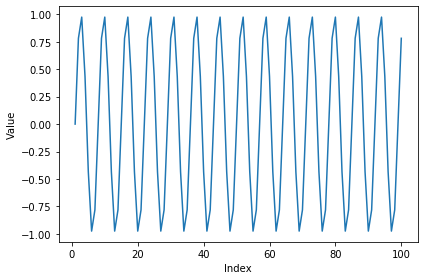

In [23]:
# visualize data
n_plot = 100
plt.figure()
plt.plot(range(1, n_plot+1), data.a[:n_plot])
plt.xlabel('Index')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

In [24]:
def _load_data(data, n_prev = 100):
    """
    data should be pd.DataFrame()
    """

    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data.iloc[i:i+n_prev].as_matrix())
        docY.append(data.iloc[i+n_prev].as_matrix())
    alsX = np.array(docX)
    alsY = np.array(docY)

    return alsX, alsY


def train_test_split(df, test_size=0.1):  
    """
    This just splits data to training and testing parts
    """
    ntrn = int(round(len(df) * (1 - test_size)))

    X_train, y_train = _load_data(df.iloc[0:ntrn])
    X_test, y_test = _load_data(df.iloc[ntrn:])
    return (X_train, y_train), (X_test, y_test)

# retrieve data
(X_train, y_train), (X_test, y_test) = train_test_split(data)

AttributeError: 'DataFrame' object has no attribute 'as_matrix'